In [1]:
from PIL import Image
import numpy as np

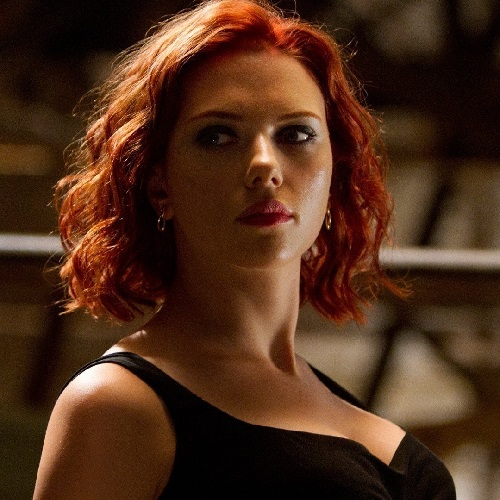

In [2]:
original_image = Image.open('blackwidow.jpg')
np_original = np.array(original_image)
original_image

In [3]:
np_original.shape

(500, 500, 3)

numpy yang akan diproses

In [4]:
np_process = np_original.copy()

In [5]:
np_process

array([[[ 23,   5,   1],
        [ 24,   6,   2],
        [ 21,   3,   0],
        ...,
        [ 22,   8,   5],
        [ 20,   6,   3],
        [ 15,   1,   0]],

       [[ 26,   8,   4],
        [ 20,   2,   0],
        [ 27,   9,   5],
        ...,
        [ 24,  10,   7],
        [ 21,   7,   4],
        [ 24,  10,   7]],

       [[ 25,   7,   3],
        [ 22,   4,   0],
        [ 18,   0,   0],
        ...,
        [ 23,   9,   6],
        [ 30,  16,  13],
        [ 28,  14,  11]],

       ...,

       [[ 40,  27,   8],
        [ 32,  19,   0],
        [ 39,  26,   7],
        ...,
        [133, 109,  85],
        [131, 107,  83],
        [137, 113,  89]],

       [[ 36,  23,   4],
        [ 27,  14,   0],
        [ 34,  21,   2],
        ...,
        [136, 112,  88],
        [136, 112,  88],
        [140, 116,  92]],

       [[ 41,  28,   9],
        [ 37,  24,   5],
        [ 44,  31,  12],
        ...,
        [142, 118,  94],
        [140, 116,  92],
        [140, 116,  92]]

## Grayscaling with average method

In [6]:
def get_average(channel):
    return ((channel[0] + channel[1] + channel[2])//3)

def get_numpy_grayscale_average(original,width,height):
    grayscale = []
    for row in range(height):
        row_array = []
        for column in range(width):
            pixel = original[row][column]
            value = get_average(pixel)
            pixel[0]=value
            pixel[1]=value
            pixel[2]=value
            row_array.append(pixel)
        grayscale.append(row_array)
    
    return np.array(grayscale)        

In [7]:
np_average_grayscale = get_numpy_grayscale_average(np_process,500,500)

<ipython-input-6-c11213f2fedb>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  return ((channel[0] + channel[1] + channel[2])//3)


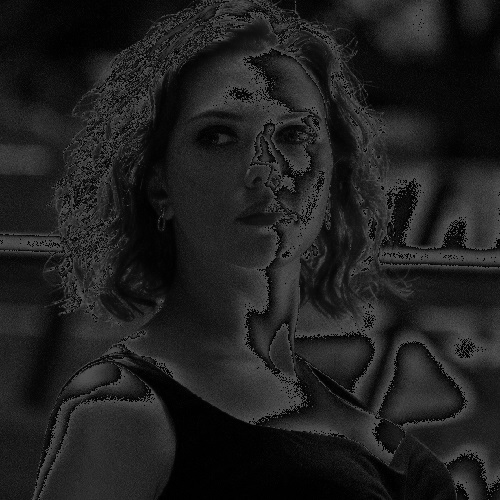

In [8]:
average_grayscale_image = Image.fromarray(np_average_grayscale)
average_grayscale_image

## Grayscaling with luminous method

##### first, we search for presentation of each color channel

In [9]:
def print_presentation_RGB(original,width,height):
    red = 0
    green = 0
    blue = 0
    for row in range(height):
        for column in range(width):
            red += original[row][column][0]
            green += original[row][column][1]
            blue += original[row][column][2]
    total = red+green+blue
    
    return [red/total,green/total,blue/total]
            

In [10]:
np_process = np_original.copy()

In [11]:
RGB_presentation = print_presentation_RGB(np_process,500,500)

In [12]:
def get_numpy_grayscale_luminous(original,width,height,presentation):
    grayscale = []
    for row in range(height):
        row_array = []
        for column in range(width):
            pixel = original[row][column]
            value = (presentation[0]*pixel[0])+(presentation[1]*pixel[1])+(presentation[2]*pixel[2])
            pixel[0]=value
            pixel[1]=value
            pixel[2]=value
            row_array.append(pixel)
        grayscale.append(row_array)
    
    return np.array(grayscale)      

In [13]:
np_luminous_grayscale = get_numpy_grayscale_luminous(np_process,500,500,RGB_presentation)

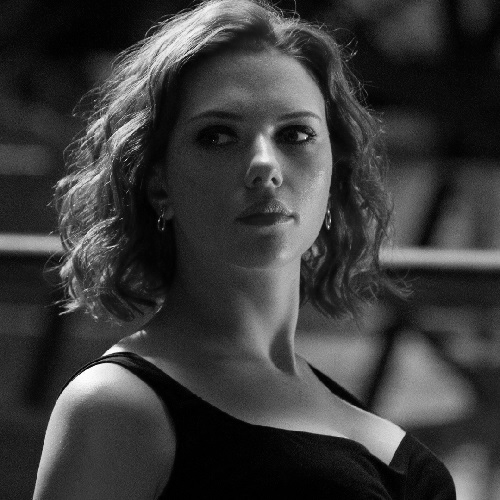

In [14]:
luminous_grayscale_image = Image.fromarray(np_luminous_grayscale)
luminous_grayscale_image

## Negative Image

##### using grayscale image

In [15]:
def get_numpy_negative_grayscale(image,width,height):
    negative = []
    for row in range(height):
        row_array = []
        for column in range(width):
            pixel = image[row][column]
            value = 255-pixel[0]
            pixel[0]=value
            pixel[1]=value
            pixel[2]=value
            row_array.append(pixel)
        negative.append(row_array)
    
    return np.array(negative)        

##### using colored image

In [16]:
def get_numpy_negative_colored(image,width,height):
    negative = []
    for row in range(height):
        row_array = []
        for column in range(width):
            pixel = image[row][column]
            for i in range(3):
                pixel[i] = 255 - pixel[i]
            row_array.append(pixel)
        negative.append(row_array)
    
    return np.array(negative)    

reset

In [17]:
np_process = np_original.copy()

In [18]:
np_negative_grayscale = get_numpy_negative_grayscale(np_process,500,500)

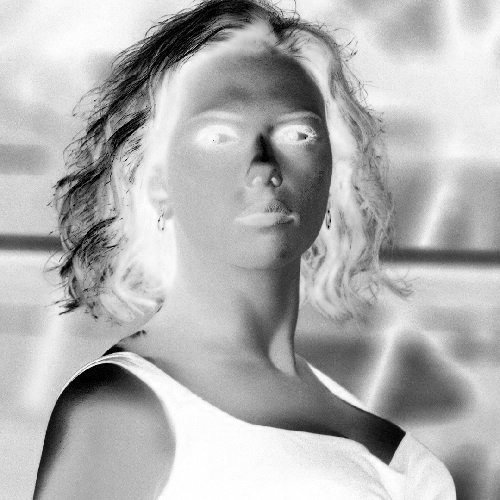

In [19]:
negative_grayscale_image = Image.fromarray(np_negative_grayscale)
negative_grayscale_image

reset

In [20]:
np_process = np_original.copy()

In [21]:
np_negative_colored = get_numpy_negative_colored(np_process,500,500)

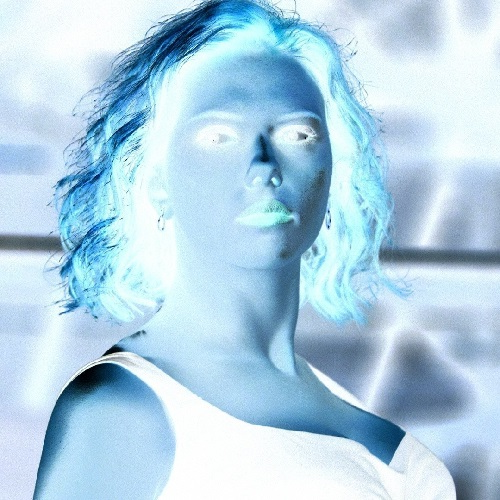

In [22]:
negative_colored_image = Image.fromarray(np_negative_colored)
negative_colored_image

## Binary Image (Treshold)

reset

In [23]:
np_process = np_original.copy()

##### Grayscale image

In [24]:
grayscale_median = np.median(np_luminous_grayscale)

In [25]:
def get_numpy_binary_grayscale(image,width,height,median):
    binary = []
    for row in range(height):
        row_array = []
        for column in range(width):
            pixel = image[row][column]
            if pixel[0] < median:
                value = 0
            else:
                value = 255
            pixel[0]=value
            pixel[1]=value
            pixel[2]=value
            row_array.append(pixel)
        binary.append(row_array)
    
    return np.array(binary)    

In [26]:
np_binary_grayscale = get_numpy_binary_grayscale(np_process,500,500,grayscale_median)

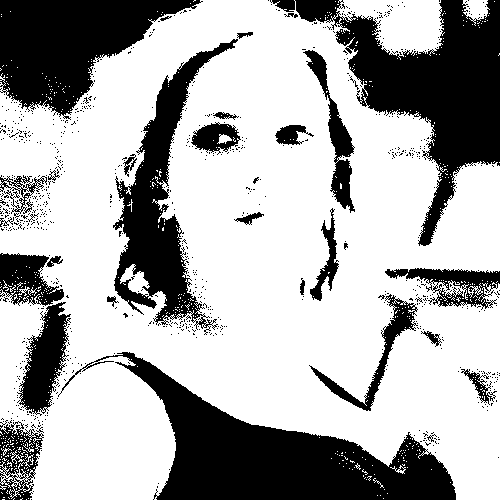

In [27]:
binary_grayscale_image = Image.fromarray(np_binary_grayscale)
binary_grayscale_image

##### Colored Image

reset

In [28]:
np_process = np_original.copy()

In [29]:
colored_median = np.median(np_process)

In [30]:
def get_numpy_colored_binary(image,width,height,median):
    binary = []
    for row in range(height):
        row_array = []
        for column in range(width):
            pixel = image[row][column]
            for i in range(3):
                if pixel[i] < median:
                    pixel[i] = 0
                else:
                    pixel[i]=255
            row_array.append(pixel)
        binary.append(row_array)
    
    return np.array(binary)    

In [31]:
np_binary_colored = get_numpy_colored_binary(np_process,500,500,colored_median)

In [32]:
binary_colored_image = Image.fromarray(np_binary_colored)

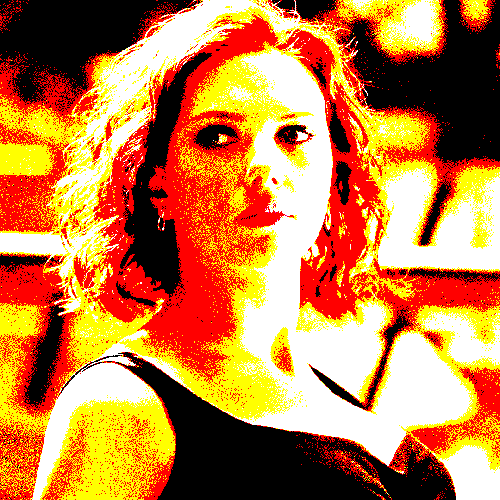

In [33]:
binary_colored_image

# Transformation

##### power of law transformation

reset

In [34]:
np_process = np_original.copy()

In [35]:
def get_numpy_law(original,width,height,c,gamma):
    law = []
    for row in range(height):
        row_array = []
        for column in range(width):
            pixel = original[row][column]
            for i in range(3):
                pixel[i] = c*(pixel[i]**gamma)
            row_array.append(pixel)
        law.append(row_array)
    
    return np.array(law)  

In [36]:
law_half = get_numpy_law(np_process,500,500,1,0.5)

In [37]:
law_image_half = Image.fromarray(law_half)

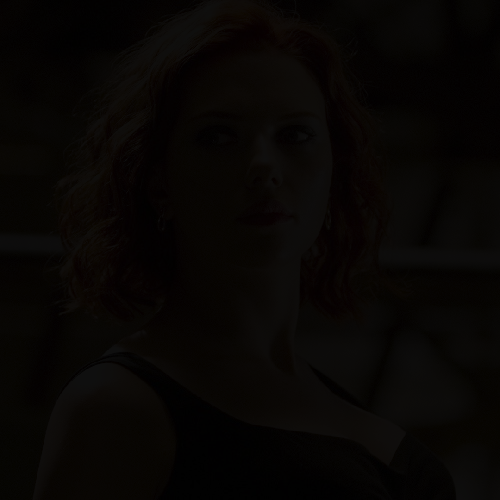

In [38]:
law_image_half

reset

In [39]:
np_process = np_original.copy()

In [40]:
law_2 = get_numpy_law(np_process,500,500,1,2)

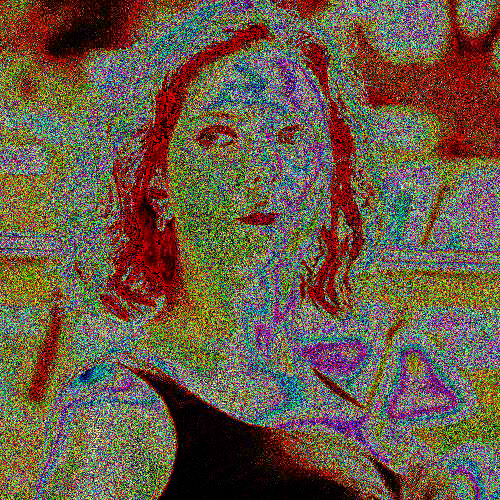

In [41]:
law_image_2 = Image.fromarray(law_2)
law_image_2

reset

In [42]:
np_process = np_original.copy()

In [43]:
law_c_half = get_numpy_law(np_process,500,500,0.5,1)

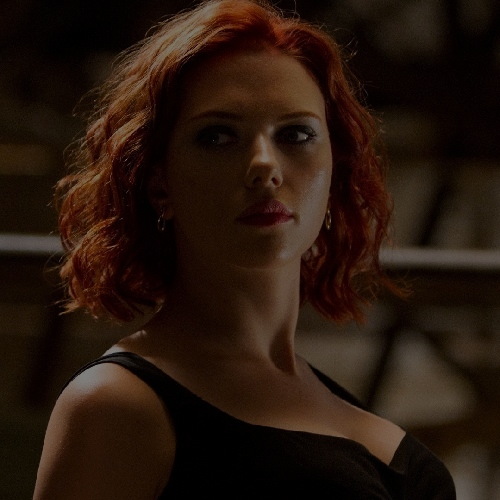

In [44]:
law_c_half_image = Image.fromarray(law_c_half)
law_c_half_image

## Bitplane slicing

reset

In [45]:
np_process = np_original.copy()

In [46]:
def bitplane_numpy(original,width,height,level):
    comparator = 2**level
    bitplane = []
    for row in range(height):
        row_array = []
        for column in range(width):
            pixel = original[row][column]
            for i in range(3):
                pixel[i] = pixel[i] & comparator
            row_array.append(pixel)
        bitplane.append(row_array)
    return np.array(bitplane)

In [47]:
np_bitplane_0 = bitplane_numpy(np_process,500,500,0)
np_process = np_original.copy()

In [48]:
np_bitplane_1 = bitplane_numpy(np_process,500,500,1)
np_process = np_original.copy()

In [49]:
np_bitplane_2 = bitplane_numpy(np_process,500,500,2)
np_process = np_original.copy()

In [50]:
np_bitplane_3 = bitplane_numpy(np_process,500,500,3)
np_process = np_original.copy()

In [51]:
np_bitplane_4 = bitplane_numpy(np_process,500,500,4)
np_process = np_original.copy()

In [52]:
np_bitplane_5 = bitplane_numpy(np_process,500,500,5)
np_process = np_original.copy()

In [53]:
np_bitplane_6 = bitplane_numpy(np_process,500,500,6)
np_process = np_original.copy()

In [54]:
np_bitplane_7 = bitplane_numpy(np_process,500,500,7)
np_process = np_original.copy()

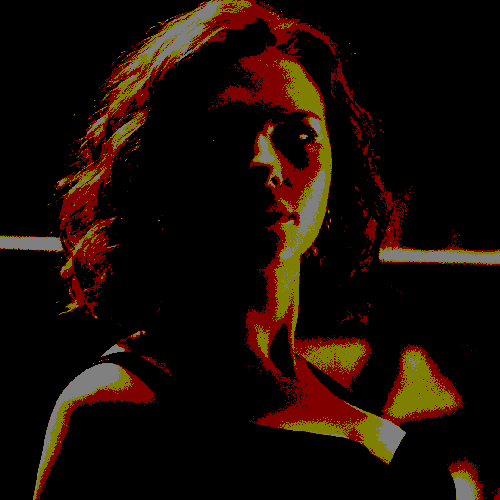

In [55]:
bitplane_image_7 = Image.fromarray(np_bitplane_7)
bitplane_image_7

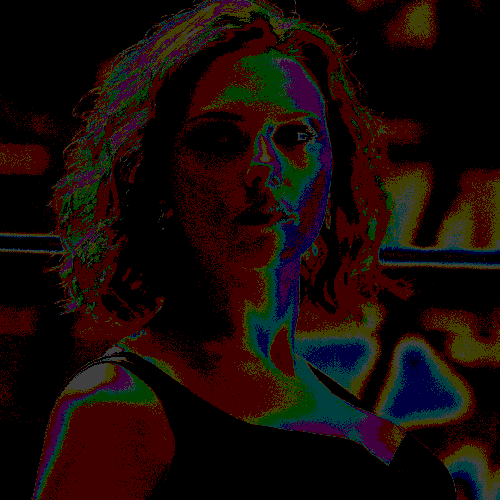

In [56]:
bitplane_image_6 = Image.fromarray(np_bitplane_6)
bitplane_image_6

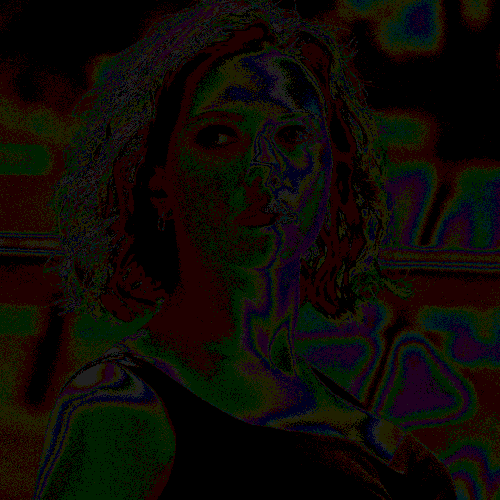

In [57]:
bitplane_image_5 = Image.fromarray(np_bitplane_5)
bitplane_image_5

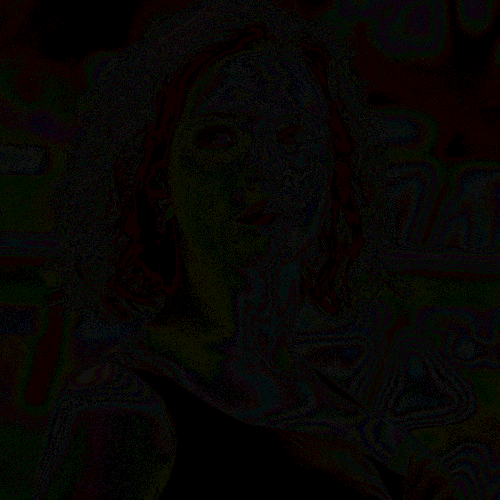

In [58]:
bitplane_image_4 = Image.fromarray(np_bitplane_4)
bitplane_image_4

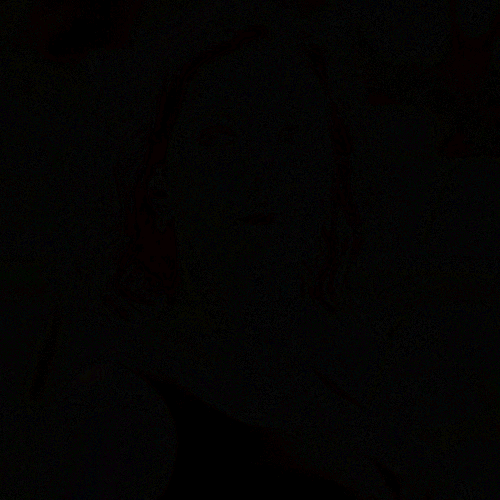

In [59]:
bitplane_image_3 = Image.fromarray(np_bitplane_3)
bitplane_image_3

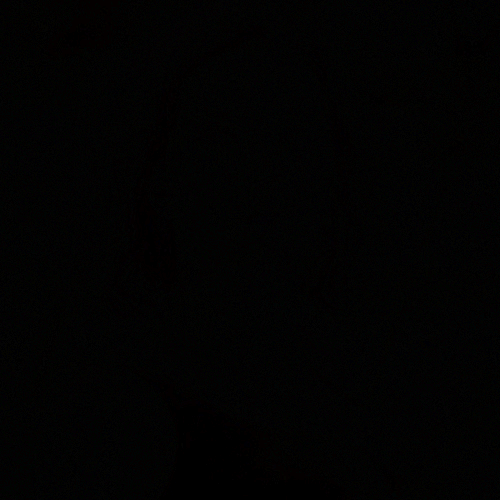

In [60]:
bitplane_image_2 = Image.fromarray(np_bitplane_2)
bitplane_image_2

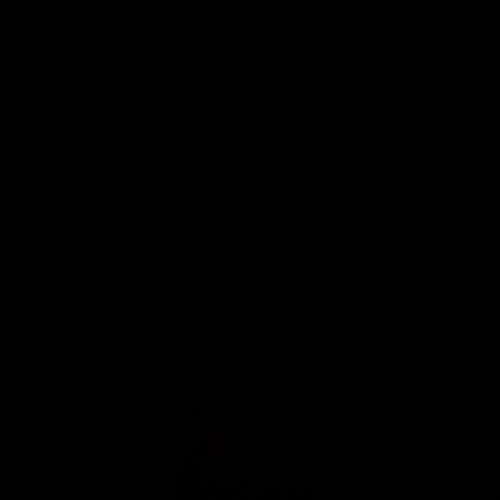

In [61]:
bitplane_image_1 = Image.fromarray(np_bitplane_1)
bitplane_image_1

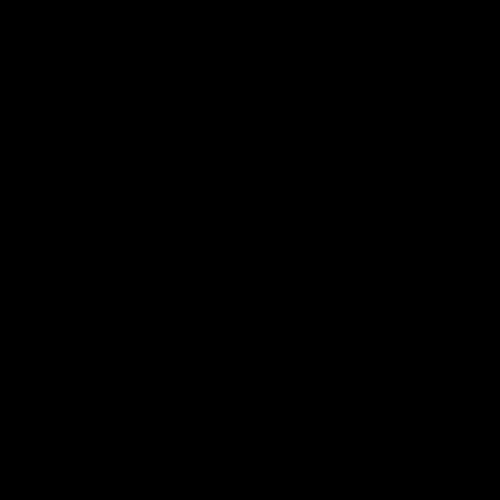

In [62]:
bitplane_image_0 = Image.fromarray(np_bitplane_0)
bitplane_image_0

## Zooming

##### Pixel Replication

reset

In [63]:
np_process = np_original.copy()

creating a new canvas

In [65]:
np_zoom_1 = np.zeros((500*2,500*2,3),dtype=np.uint8)

In [67]:
for row in range(len(np_zoom_1)):
    for column in range(len(np_zoom_1)):
        for i in range(3):
            np_zoom_1[row][column][i] = np_process[row//2][column//2][i]

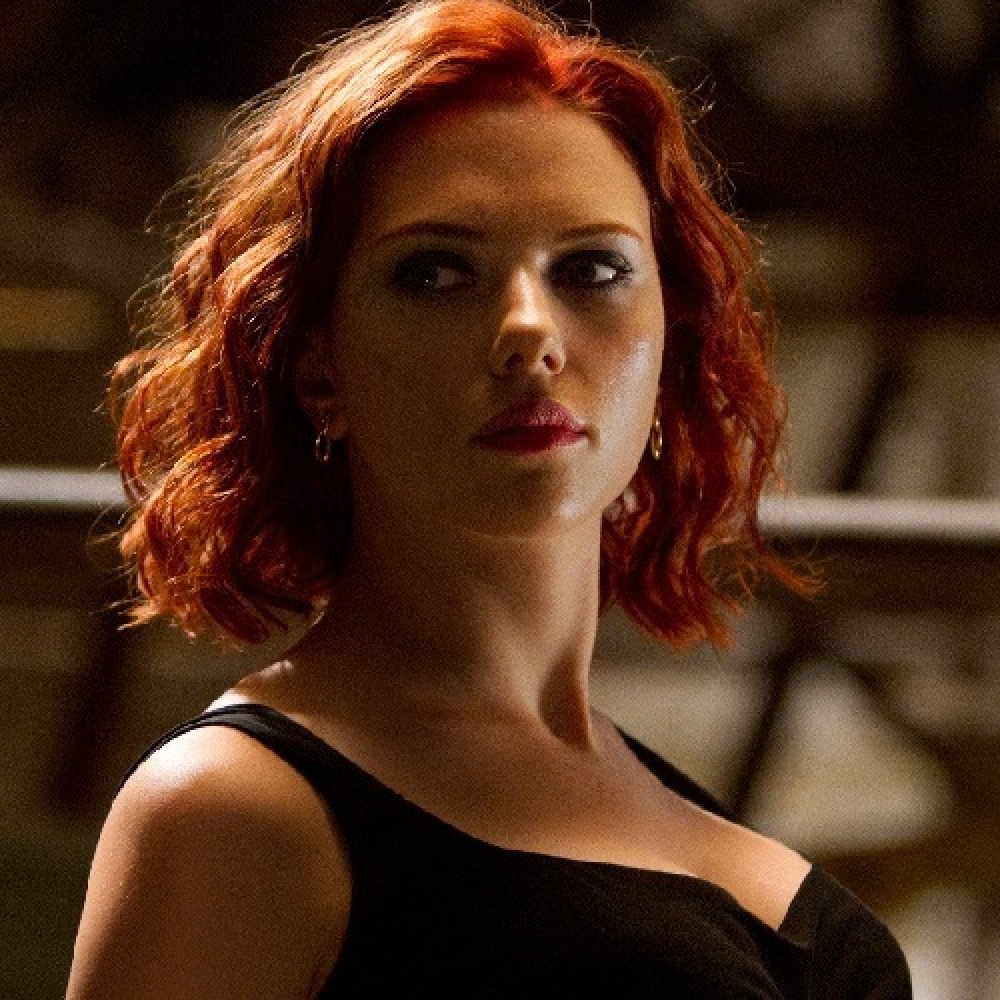

In [68]:
zoom_replication_image = Image.fromarray(np_zoom_1)
zoom_replication_image

# Transformasi morfologi

##### Translasi

reset

In [122]:
np_process = np_original.copy()

creating new canvas

In [123]:
np_translate = np.zeros((500*2,500*2,3),dtype=np.uint8)

In [124]:
translate_matrix = np.array([
    [1,0,160],
    [0,1,50],
    [0,0,1]
])

In [125]:
for row in range(len(np_process)):
    for column in range(len(np_process)):
        position_array = np.array([[row+1],[column+1],[1]])
        new_position = translate_matrix.dot(position_array)
        new_row = new_position[0][0]-1
        new_column = new_position[1][0]-1
        np_translate[new_row][new_column] = np_process[row][column]

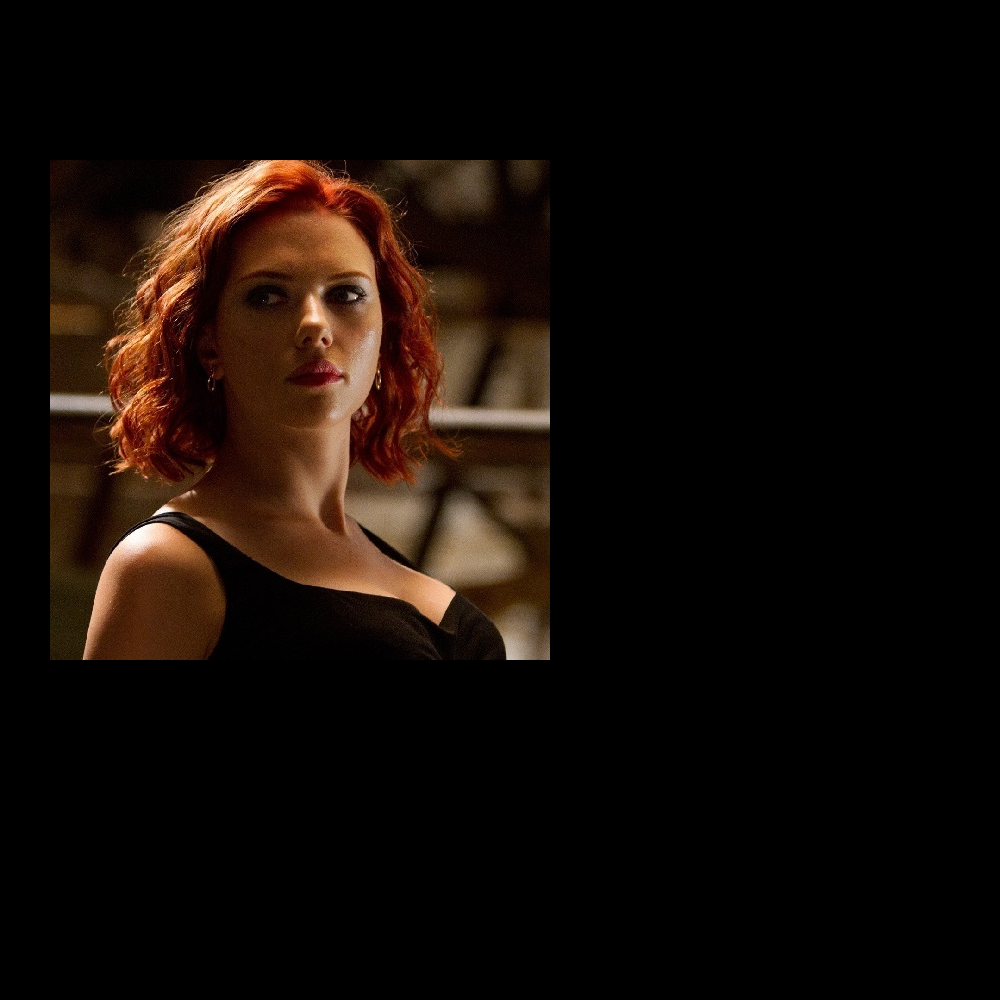

In [126]:
test = Image.fromarray(np_translate)
test

##### Scale

In [133]:
np_process = np_original.copy()
np_scale = np.zeros((500*2,500*2,3),dtype=np.uint8)

scale_matrix = np.array([[0.9,0,0],
                        [0,0.7,0],
                        [0,0,1]])

In [134]:
for row in range(len(np_process)):
    for column in range(len(np_process)):
        position_array = np.array([[row+1],[column+1],[1]])
        new_position = scale_matrix.dot(position_array)
        new_row = int(new_position[0][0]-1)
        new_column = int(new_position[1][0]-1)
        np_scale[new_row][new_column] = np_process[row][column]

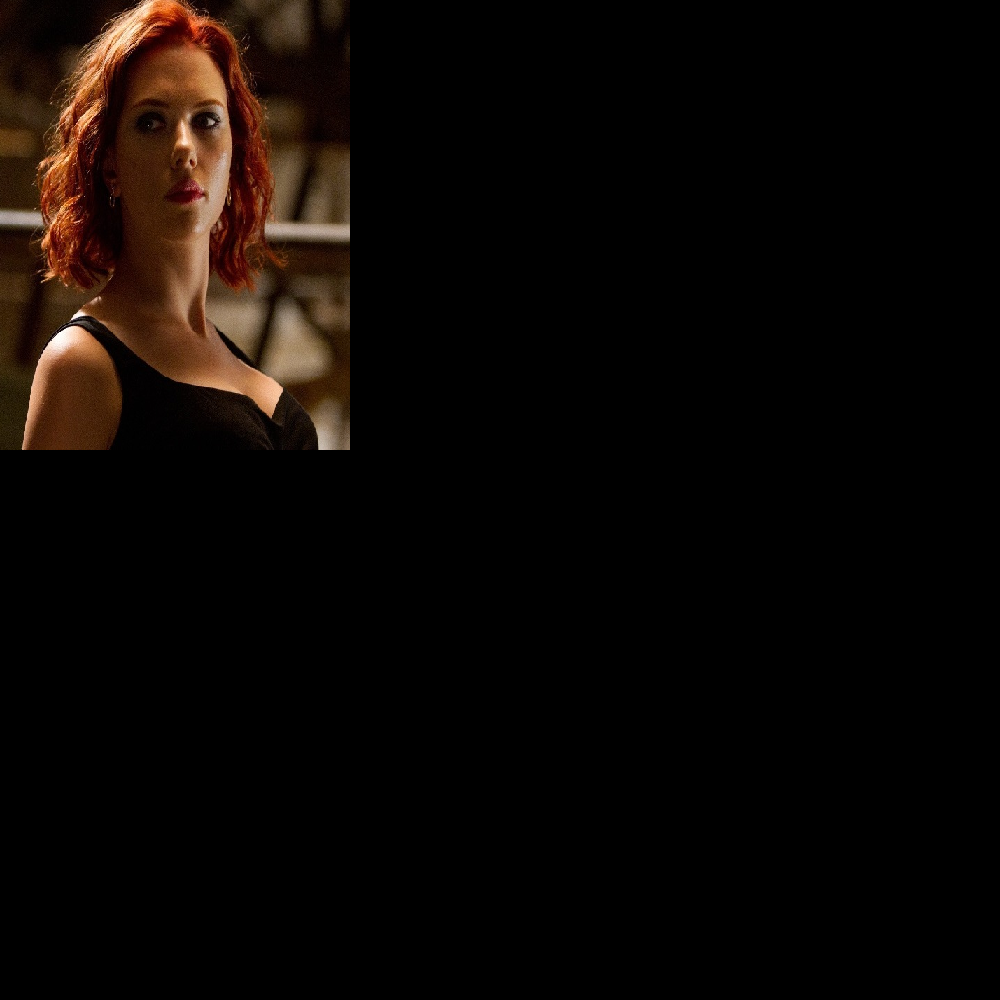

In [136]:
test = Image.fromarray(np_scale)
test

##### Rotate

In [137]:
np_process = np_original.copy()
np_rotate = np.zeros((500*2,500*2,3),dtype=np.uint8)

rotate_matrix = np.array( [[np.cos(np.deg2rad(45)),np.sin(np.deg2rad(45)),0],
                            [0-np.sin(np.deg2rad(45)),np.cos(np.deg2rad(45)),0],
                            [0,0,1]])

In [138]:
for row in range(len(np_process)):
    for column in range(len(np_process)):
        position_array = np.array([[row+1],[column+1],[1]])
        new_position = rotate_matrix.dot(position_array)
        new_row = int(new_position[0][0]-1)
        new_column = int(new_position[1][0]-1)
        np_rotate[new_row][new_column] = np_process[row][column]

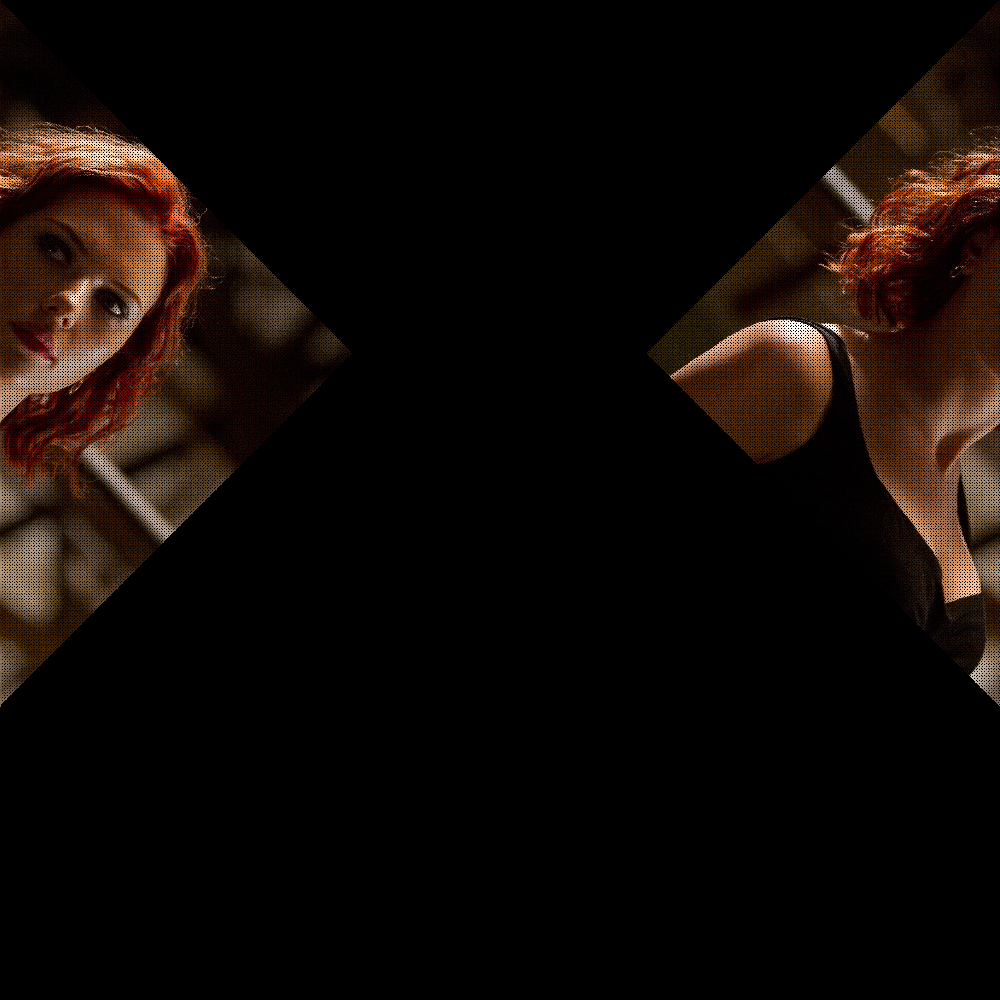

In [140]:
test = Image.fromarray(np_rotate)
test

##### Shear

In [145]:
np_process = np_original.copy()
np_shear = np.zeros((500*2,500*2,3),dtype=np.uint8)

shear_matrix = np.array( [[1,0.5,0],
                            [0,1,0],
                            [0,0,1]])

In [146]:
for row in range(len(np_process)):
    for column in range(len(np_process)):
        position_array = np.array([[row+1],[column+1],[1]])
        new_position = shear_matrix.dot(position_array)
        new_row = int(new_position[0][0]-1)
        new_column = int(new_position[1][0]-1)
        np_shear[new_row][new_column] = np_process[row][column]

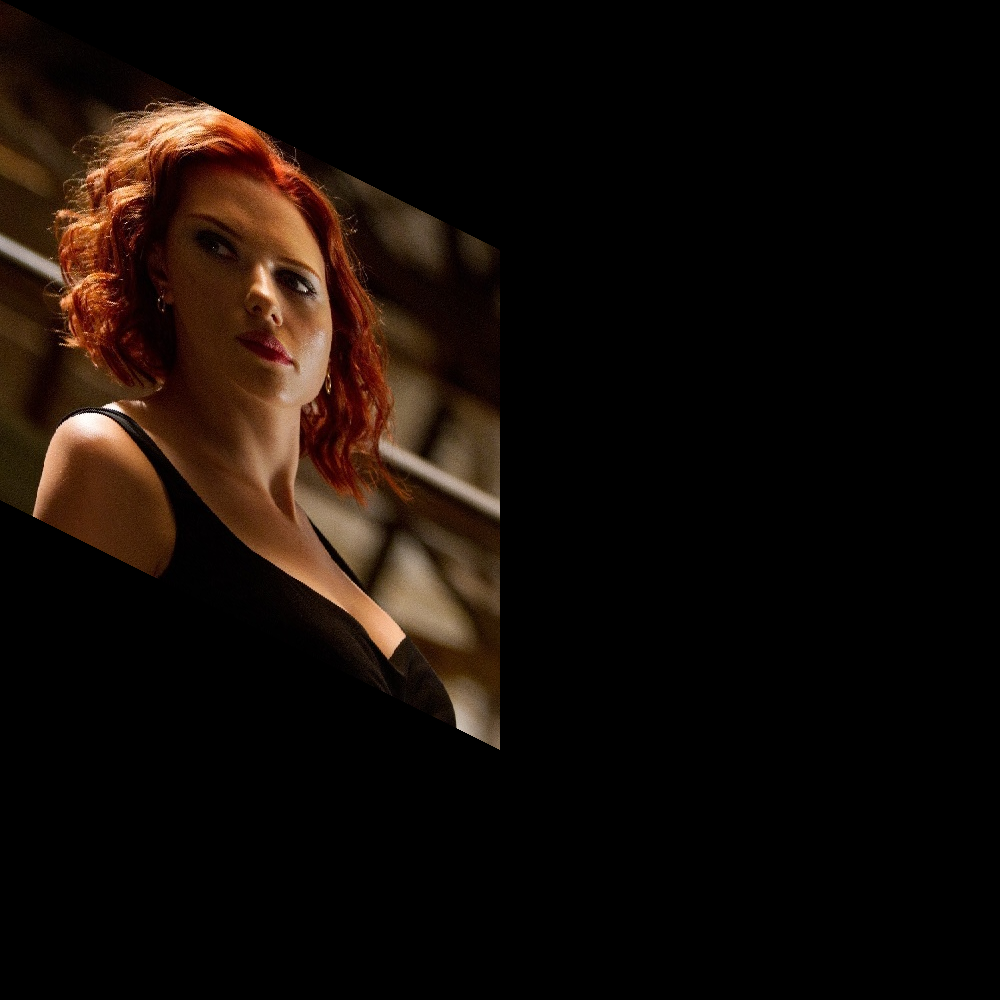

In [148]:
test = Image.fromarray(np_shear)
test

##### Mirror

In [149]:
np_process = np_original.copy()
np_mirror = np.zeros((500*2,500*2,3),dtype=np.uint8)

mirror_matrix = np.array( [[-1,0,0],
                            [0,-1,0],
                            [0,0,1]])

In [150]:
for row in range(len(np_process)):
    for column in range(len(np_process)):
        position_array = np.array([[row+1],[column+1],[1]])
        new_position = mirror_matrix.dot(position_array)
        new_row = int(new_position[0][0]-1)
        new_column = int(new_position[1][0]-1)
        np_mirror[new_row][new_column] = np_process[row][column]

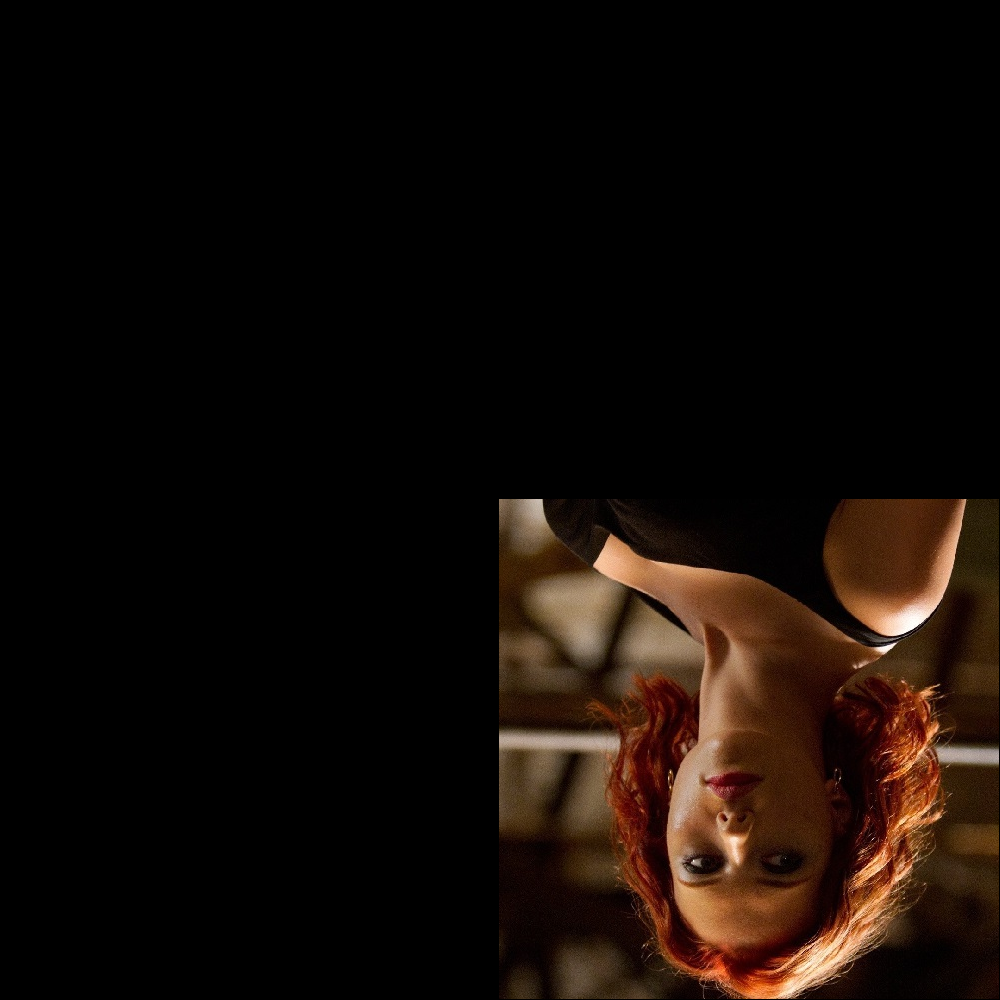

In [152]:
test = Image.fromarray(np_mirror)
test